<a href="https://colab.research.google.com/github/shuahoon/CODSOFT/blob/main/Fraud%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ignore warnings
import warnings
warnings.filterwarnings('ignore', message='.*')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt

plt.style.use('Solarize_Light2')
%matplotlib inline

In [4]:
test_df = pd.read_csv('fraudTest.csv')
train_df = pd.read_csv('fraudTrain.csv')

In [5]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11706 entries, 0 to 11705
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11706 non-null  int64  
 1   trans_date_trans_time  11706 non-null  object 
 2   cc_num                 11706 non-null  int64  
 3   merchant               11706 non-null  object 
 4   category               11706 non-null  object 
 5   amt                    11706 non-null  float64
 6   first                  11706 non-null  object 
 7   last                   11706 non-null  object 
 8   gender                 11706 non-null  object 
 9   street                 11706 non-null  object 
 10  city                   11706 non-null  object 
 11  state                  11706 non-null  object 
 12  zip                    11706 non-null  int64  
 13  lat                    11706 non-null  float64
 14  long                   11706 non-null  float64
 15  ci

In [7]:
train_df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [8]:
train_df.duplicated().sum()

0

In [9]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,11706.00000,1.170600e+04,11706.000000,11706.000000,11706.000000,11706.000000,1.170600e+04,1.170500e+04,11705.000000,11705.000000,11705.000000
mean,5852.50000,4.258380e+17,68.760918,49212.270203,38.562065,-90.540940,8.952011e+04,1.325688e+09,38.560738,-90.535437,0.004101
std,3379.37546,1.320777e+18,113.379429,27100.223974,5.173634,14.353408,3.001465e+05,1.873839e+05,5.199968,14.375129,0.063909
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,2926.25000,1.800462e+14,9.750000,26041.000000,34.743700,-97.060900,7.430000e+02,1.325511e+09,34.831130,-97.161258,0.000000
50%,5852.50000,3.521417e+15,48.495000,48438.000000,39.371600,-87.644300,2.408000e+03,1.325704e+09,39.360761,-87.632339,0.000000
75%,8778.75000,4.642255e+15,83.122500,72165.000000,41.846700,-80.158000,1.940800e+04,1.325863e+09,41.896736,-80.226861,0.000000
max,11705.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325969e+09,66.645176,-66.967742,1.000000


In [10]:
fraud_cnt = train_df[train_df['is_fraud'] == 1]['is_fraud'].count()
print(f"Fraud Count (is_fraud): {fraud_cnt} cases")

# Fraud Rate (%): number of fraud transactions / total number of transactions
# print(f"Fraud Transaction Rate: {round(fraud_cnt/train_df['is_fraud'].count(), 4)*100}%")
print(f"Fraud Transaction Rate: {round(train_df['is_fraud'].mean()*100, 2)}%")


Fraud Count (is_fraud): 48 cases
Fraud Transaction Rate: 0.41%


In [11]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11697 entries, 0 to 11696
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11697 non-null  int64  
 1   trans_date_trans_time  11697 non-null  object 
 2   cc_num                 11697 non-null  int64  
 3   merchant               11697 non-null  object 
 4   category               11697 non-null  object 
 5   amt                    11697 non-null  float64
 6   first                  11697 non-null  object 
 7   last                   11697 non-null  object 
 8   gender                 11697 non-null  object 
 9   street                 11697 non-null  object 
 10  city                   11697 non-null  object 
 11  state                  11697 non-null  object 
 12  zip                    11697 non-null  int64  
 13  lat                    11697 non-null  float64
 14  long                   11697 non-null  float64
 15  ci

In [13]:
test_df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [14]:
test_df.duplicated().sum()

0

In [15]:
test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,11697.000000,1.169700e+04,11697.000000,11697.000000,11697.000000,11697.000000,1.169700e+04,1.169600e+04,11696.000000,11696.000000,11696.000000
mean,5848.000000,4.065538e+17,66.241288,48583.520988,38.491370,-90.029371,9.471794e+04,1.371949e+09,38.477973,-90.028840,0.002479
std,3376.777384,1.295805e+18,124.015784,26706.800199,5.112304,13.575833,3.222010e+05,7.917888e+04,5.144570,13.592734,0.049735
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,2924.000000,1.800429e+14,9.200000,26237.000000,34.509100,-96.618400,7.820000e+02,1.371885e+09,34.627043,-96.595760,0.000000
50%,5848.000000,3.518669e+15,43.770000,48034.000000,39.342600,-86.965700,2.691000e+03,1.371941e+09,39.332037,-87.238137,0.000000
75%,8772.000000,4.634956e+15,79.770000,72011.000000,42.014400,-80.175200,2.163500e+04,1.372010e+09,41.997231,-80.270511,0.000000
max,11696.000000,4.992346e+18,3396.840000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372113e+09,65.951727,-67.122946,1.000000


In [16]:
test_fraud_cnt = test_df[test_df['is_fraud'] == 1]['is_fraud'].count()
print(f"Fraud Count (is_fraud): {test_fraud_cnt} cases")

# Fraud Rate (%): number of fraud transactions / total number of transactions
print(f"Fraud Transaction Rate: {round(test_df['is_fraud'].mean()*100, 2)}%")


Fraud Count (is_fraud): 29 cases
Fraud Transaction Rate: 0.25%


In [17]:
# Total fraud transaction count and fraud transaction rate for train and test sets
total_fraud_cnt = fraud_cnt + test_fraud_cnt
print(f"Total (train + test) fraud transaction count: {total_fraud_cnt} cases")

# Overall fraud rate (%): total fraud transaction count / total transaction count
print(f"Overall (train + test) fraud rate: {round((total_fraud_cnt / (train_df['is_fraud'].count() + test_df['is_fraud'].count())), 4) * 100}%")


Total (train + test) fraud transaction count: 77 cases
Overall (train + test) fraud rate: 0.33%


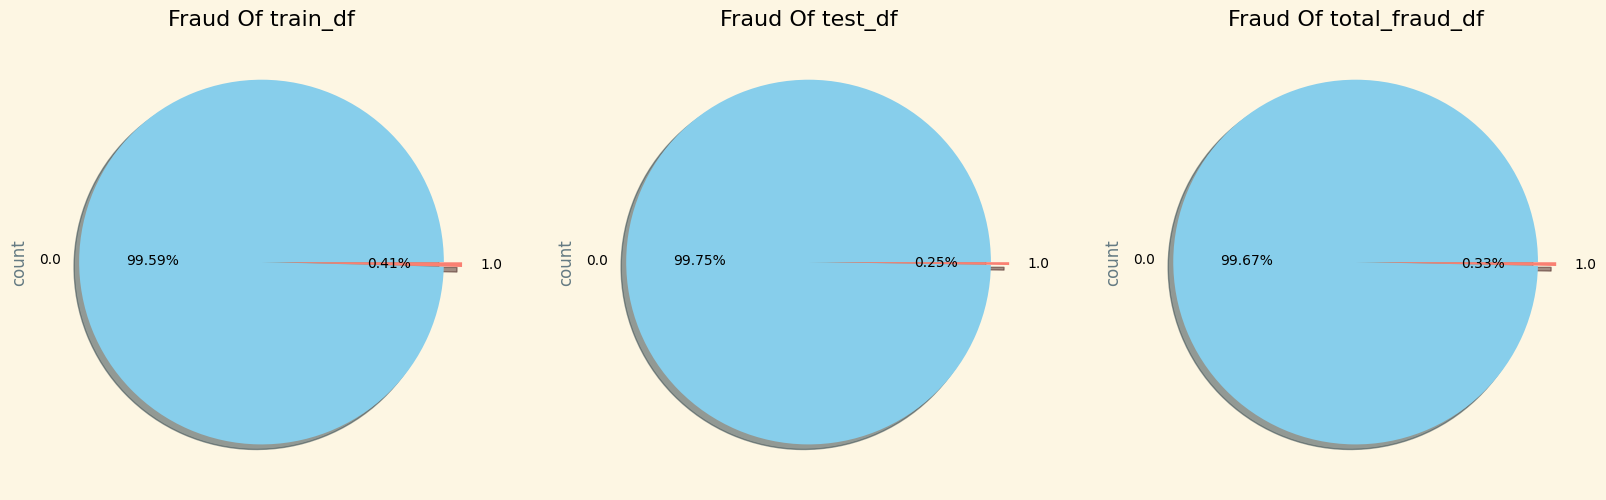

In [18]:

total_fraud_df = pd.concat([train_df['is_fraud'], test_df['is_fraud']], axis=0, ignore_index=True)


fig, ax = plt.subplots(1, 3, figsize=(20, 10))
train_df['is_fraud'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=['skyblue', 'salmon'])
ax[0].set_title('Fraud Of train_df')
test_df['is_fraud'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=['skyblue', 'salmon'])
ax[1].set_title('Fraud Of test_df')
total_fraud_df.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[2], shadow=True, colors=['skyblue', 'salmon'])
ax[2].set_title('Fraud Of total_fraud_df')
plt.show()

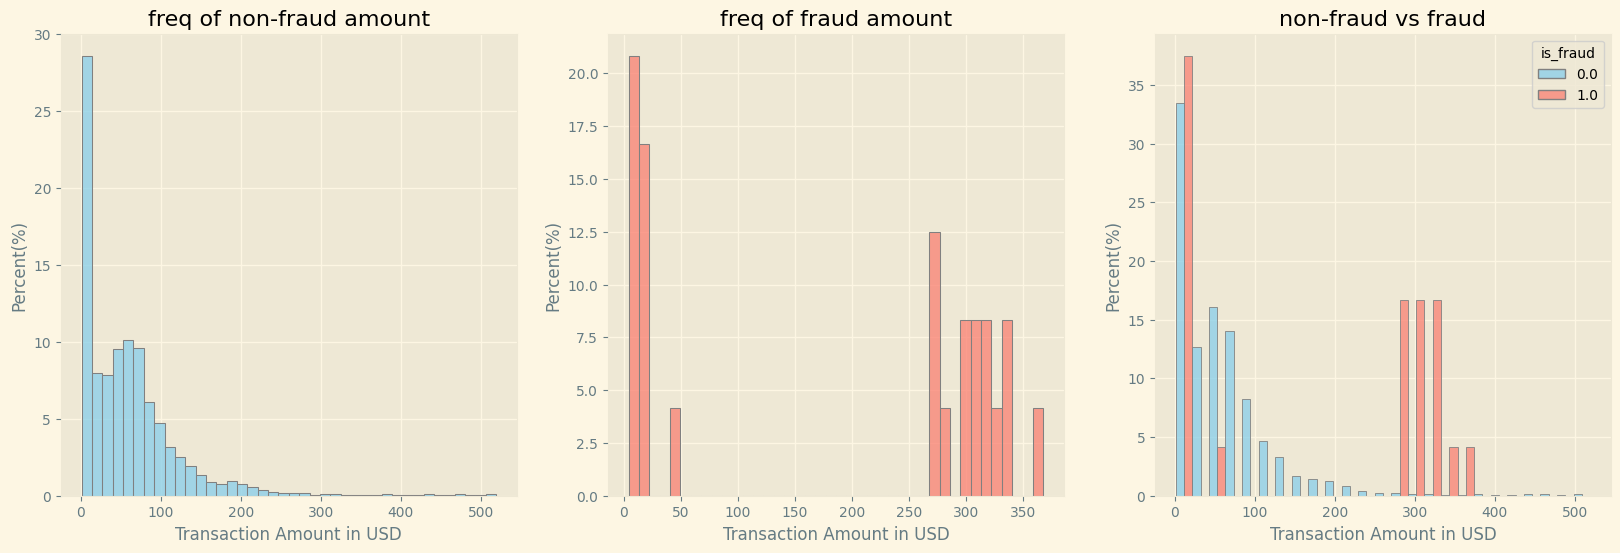

In [19]:
p99 = train_df["amt"].quantile(0.99)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(x='amt', data=train_df[(train_df['is_fraud'] == 0) & (train_df['amt'] <= p99)], stat='percent', bins=40, ax=ax[0], color='skyblue', edgecolor='grey')
ax[0].set_title('freq of non-fraud amount')
ax[0].set_xlabel('Transaction Amount in USD')
ax[0].set_ylabel('Percent(%)')

sns.histplot(x='amt', data=train_df[(train_df['is_fraud'] == 1) & (train_df['amt'] <= p99)], stat='percent', bins=40, ax=ax[1], color='salmon', edgecolor='grey')
ax[1].set_title('freq of fraud amount')
ax[1].set_xlabel('Transaction Amount in USD')
ax[1].set_ylabel('Percent(%)')

sns.histplot(x='amt', data=train_df[train_df.amt <= p99], hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=25, ax=ax[2], palette={0: 'skyblue', 1: 'salmon'}, edgecolor='grey')
ax[2].set_title('non-fraud vs fraud')
ax[2].set_xlabel('Transaction Amount in USD')
ax[2].set_ylabel('Percent(%)')

plt.show()

In [20]:
hour = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
day = pd.to_datetime(train_df['trans_date_trans_time']).dt.day
month = pd.to_datetime(train_df['trans_date_trans_time']).dt.month
year = pd.to_datetime(train_df['trans_date_trans_time']).dt.year
is_fraud = train_df['is_fraud']
train_time_df = pd.DataFrame({'hour': hour, 'day': day, 'month': month, 'year': year, 'is_fraud': is_fraud})
train_time_df

,hour,day,month,year,is_fraud
0,0,1,1,2019,0.0
1,0,1,1,2019,0.0
2,0,1,1,2019,0.0
3,0,1,1,2019,0.0
4,0,1,1,2019,0.0
...,...,...,...,...,...
11701,20,7,1,2019,0.0
11702,20,7,1,2019,0.0
11703,20,7,1,2019,0.0
11704,20,7,1,2019,0.0


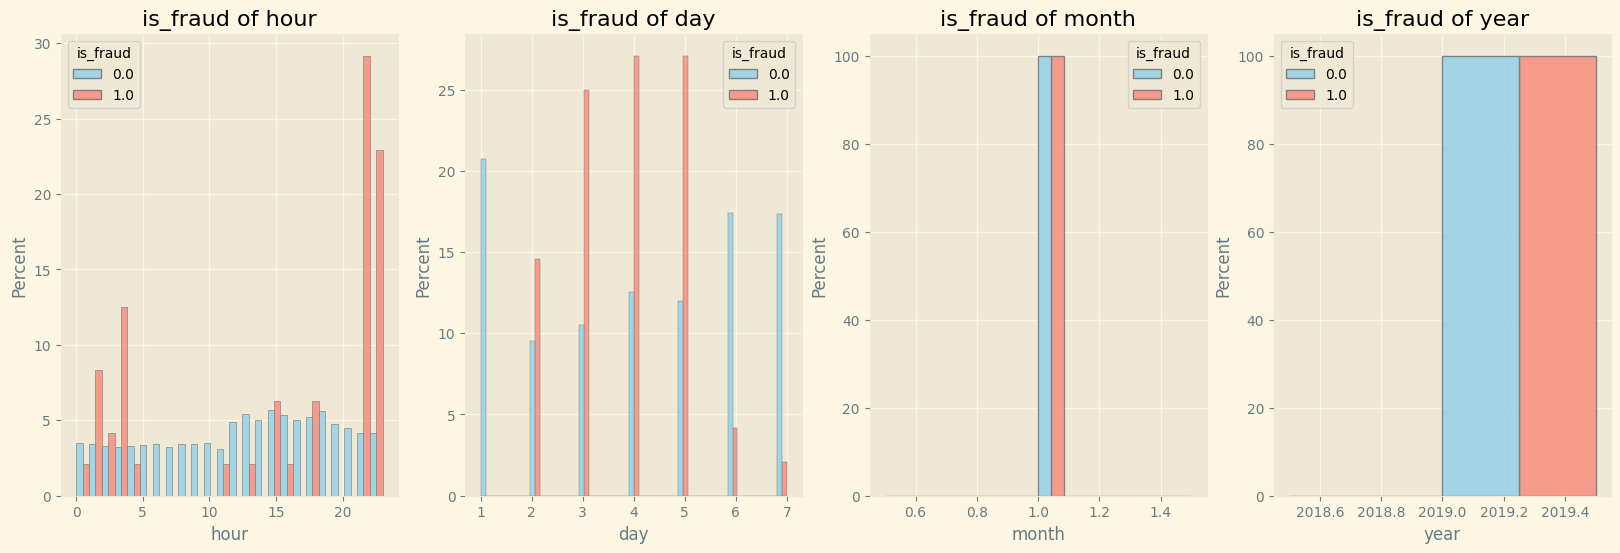

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

# hour
sns.histplot(x='hour', data=train_time_df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=24, ax=ax[0], palette={0: 'skyblue', 1: 'salmon'}, edgecolor='grey')
ax[0].set_title('is_fraud of hour')

# day
sns.histplot(x='day', data=train_time_df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=31, ax=ax[1], palette={0: 'skyblue', 1: 'salmon'}, edgecolor='grey')
ax[1].set_title('is_fraud of day')

# month
sns.histplot(x='month', data=train_time_df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=12, ax=ax[2], palette={0: 'skyblue', 1: 'salmon'}, edgecolor='grey')
ax[2].set_title('is_fraud of month')

# year
sns.histplot(x='year', data=train_time_df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=2, ax=ax[3], palette={0: 'skyblue', 1: 'salmon'}, edgecolor='grey')
ax[3].set_title('is_fraud of year')

plt.show()

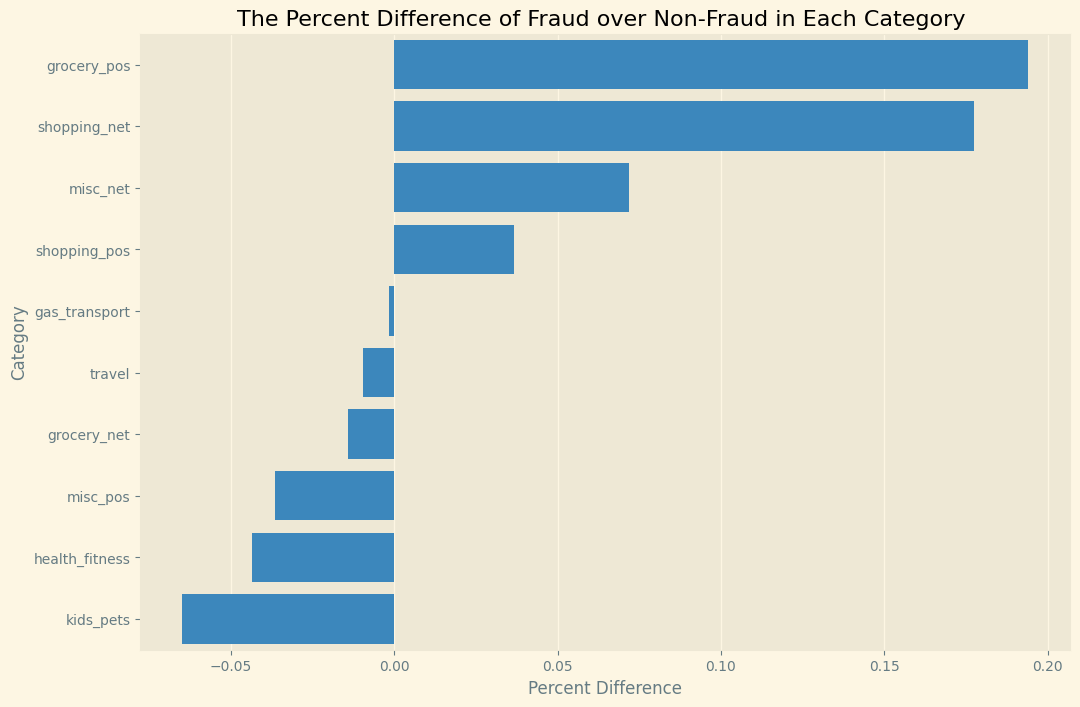

In [22]:
a = train_df[train_df['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns = ['category', 'not fraud percentage']

b = train_df[train_df['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns = ['category', 'fraud percentage']
ab = a.merge(b,on='category')
ab['diff'] = ab['fraud percentage'] - ab['not fraud percentage']

plt.figure(figsize=(12, 8))
ax = sns.barplot(y='category', x='diff', data=ab.sort_values('diff', ascending=False))
ax.set_xlabel('Percent Difference')
ax.set_ylabel('Category')
plt.title('The Percent Difference of Fraud over Non-Fraud in Each Category ')

plt.show()

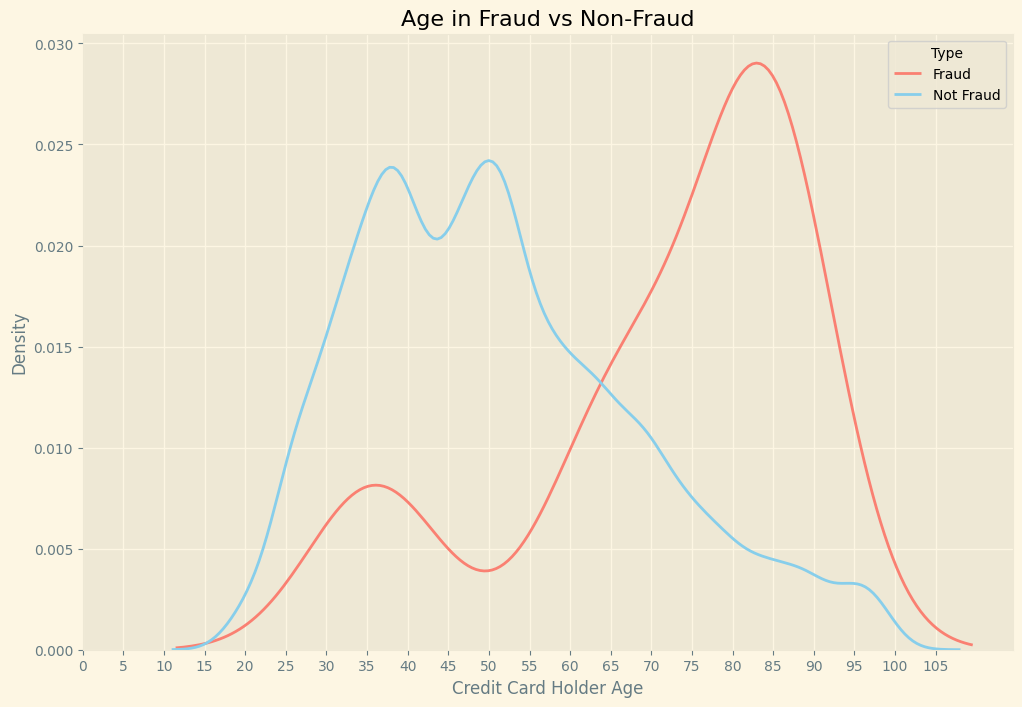

In [23]:
plt.figure(figsize=(12, 8))
train_df['age'] = dt.date.today().year - pd.to_datetime(train_df['dob']).dt.year
ax = sns.kdeplot(x='age', data=train_df, hue='is_fraud', common_norm=False, palette={0:'skyblue', 1:'salmon'})
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age in Fraud vs Non-Fraud')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.show()

In [24]:
train_df['age'].describe()

,age
count,11705.000000
mean,51.202050
std,17.519038
min,19.000000
25%,38.000000
50%,49.000000
75%,62.000000
max,100.000000


In [25]:
train_state_fraud = train_df.groupby(['state']).sum('is_fraud').sort_values('is_fraud', ascending=False)
train_state_fraud.reset_index(level=0, inplace=True)
train_state_fraud = train_state_fraud.sort_values('state', ascending=True)
train_state_fraud.reset_index(inplace=True)
train_state_fraud.drop(columns='index', inplace=True)
train_state_non_fraud_counts = train_df.groupby('state').agg(non_fraud_count=('is_fraud', lambda x: (x == 0).sum()))

In [26]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=['Fraud Transactions by State', 'Non-Fraud Transactions by State'],
                    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]])

fig.add_trace(go.Choropleth(
    locations=train_state_fraud['state'],
    text=train_state_fraud['state'],
    z=train_state_fraud['is_fraud'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar=dict(title="is_fraud", x=0.45)
), row=1, col=1)


fig.add_trace(go.Choropleth(
    locations=train_state_non_fraud_counts.index,
    text=train_state_non_fraud_counts.index,
    z=train_state_non_fraud_counts['non_fraud_count'].astype(float),
    locationmode='USA-states',
    colorscale='Blues',
    colorbar=dict(title="non_fraud", x=1.0)
), row=1, col=2)


fig.update_geos(scope='usa', row=1, col=1)
fig.update_geos(scope='usa', row=1, col=2)


fig.update_layout(
    title_text="Fraud vs Non-Fraud Transactions by State",
    title_x=0.5,
    title_xanchor='center'
)

# 표시
fig.show()

In [27]:
train_df[['hour', 'day', 'month', 'year']] = train_time_df[['hour', 'day', 'month', 'year']]
collected_columns = ['is_fraud', 'hour', 'day', 'month', 'year', 'category', 'amt', 'city', 'state', 'zip', 'city_pop', 'job', 'unix_time', 'age']
collected_train_df = train_df[collected_columns]

In [28]:
collected_train_df.corr(numeric_only=True)

,is_fraud,hour,day,month,year,amt,zip,city_pop,unix_time,age
is_fraud,1.000000,0.025405,-0.005788,NaN,NaN,0.268688,0.024361,0.030797,-0.002551,0.073741
hour,0.025405,1.000000,-0.069430,NaN,NaN,-0.048774,-0.004191,0.001857,0.059482,-0.180975
day,-0.005788,-0.069430,1.000000,NaN,NaN,0.017666,-0.016928,0.007857,0.991657,-0.006309
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,0.268688,-0.048774,0.017666,NaN,NaN,1.000000,0.008850,0.002685,0.011416,0.012248
zip,0.024361,-0.004191,-0.016928,NaN,NaN,0.008850,1.000000,0.073452,-0.017465,0.034490
city_pop,0.030797,0.001857,0.007857,NaN,NaN,0.002685,0.073452,1.000000,0.008143,-0.095691
unix_time,-0.002551,0.059482,0.991657,NaN,NaN,0.011416,-0.017465,0.008143,1.000000,-0.029745
age,0.073741,-0.180975,-0.006309,NaN,NaN,0.012248,0.034490,-0.095691,-0.029745,1.000000


In [29]:
print(f"unique number of category: {collected_train_df['category'].nunique()}")
print(f"unique number of city: {collected_train_df['city'].nunique()}")
print(f"unique number of state: {collected_train_df['state'].nunique()}")
print(f"unique number of job: {collected_train_df['job'].nunique()}")

unique number of category: 14
unique number of city: 833
unique number of state: 50
unique number of job: 475


In [30]:
hour = pd.to_datetime(test_df['trans_date_trans_time']).dt.hour
day = pd.to_datetime(test_df['trans_date_trans_time']).dt.day
month = pd.to_datetime(test_df['trans_date_trans_time']).dt.month
year = pd.to_datetime(test_df['trans_date_trans_time']).dt.year
is_fraud = test_df['is_fraud']
test_time_df = pd.DataFrame({'hour': hour, 'day': day, 'month': month, 'year': year, 'is_fraud': is_fraud})

test_df['age'] = dt.date.today().year - pd.to_datetime(test_df['dob']).dt.year

# collect the columns of test_df
test_df[['hour', 'day', 'month', 'year']] = test_time_df[['hour', 'day', 'month', 'year']]
collected_columns = ['is_fraud', 'hour', 'day', 'month', 'year', 'category', 'amt', 'city', 'state', 'zip', 'city_pop', 'job', 'unix_time', 'age']
collected_test_df = test_df[collected_columns]

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(collected_train_df['category'])
encoded_category = le.transform(collected_train_df['category'])
collected_train_df['enc_category'] = encoded_category

le.fit(collected_train_df['city'])
encoded_city = le.transform(collected_train_df['city'])
collected_train_df['enc_city'] = encoded_city

le.fit(collected_train_df['state'])
encoded_state = le.transform(collected_train_df['state'])
collected_train_df['enc_state'] = encoded_state

le.fit(collected_train_df['job'])
encoded_job = le.transform(collected_train_df['job'])
collected_train_df['enc_job'] = encoded_state

In [32]:
print(encoded_category.shape)
print(encoded_city.shape)
print(encoded_state.shape)
print(encoded_job.shape)

(11706,)
(11706,)
(11706,)
(11706,)


In [33]:
collected_train_df.corr(numeric_only=True)

,is_fraud,hour,day,month,year,amt,zip,city_pop,unix_time,age,enc_category,enc_city,enc_state,enc_job
is_fraud,1.000000,0.025405,-0.005788,NaN,NaN,0.268688,0.024361,0.030797,-0.002551,0.073741,0.019713,0.020795,-0.015683,-0.015683
hour,0.025405,1.000000,-0.069430,NaN,NaN,-0.048774,-0.004191,0.001857,0.059482,-0.180975,0.156690,-0.000794,0.015767,0.015767
day,-0.005788,-0.069430,1.000000,NaN,NaN,0.017666,-0.016928,0.007857,0.991657,-0.006309,-0.006621,0.015287,-0.011308,-0.011308
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,0.268688,-0.048774,0.017666,NaN,NaN,1.000000,0.008850,0.002685,0.011416,0.012248,0.023846,0.003854,-0.012966,-0.012966
zip,0.024361,-0.004191,-0.016928,NaN,NaN,0.008850,1.000000,0.073452,-0.017465,0.034490,0.001760,0.066716,-0.130543,-0.130543
city_pop,0.030797,0.001857,0.007857,NaN,NaN,0.002685,0.073452,1.000000,0.008143,-0.095691,0.007746,0.037672,-0.001020,-0.001020
unix_time,-0.002551,0.059482,0.991657,NaN,NaN,0.011416,-0.017465,0.008143,1.000000,-0.029745,0.013523,0.015270,-0.009382,-0.009382
age,0.073741,-0.180975,-0.006309,NaN,NaN,0.012248,0.034490,-0.095691,-0.029745,1.000000,-0.001664,-0.020928,-0.058532,-0.058532


In [34]:
X_train = collected_train_df[['hour', 'day', 'month', 'amt', 'zip', 'city_pop', 'unix_time', 'age', 'enc_category', 'enc_city', 'enc_state', 'enc_job']]
y_train = collected_train_df['is_fraud']

print(X_train.shape)
print(y_train.shape)

(11706, 12)
(11706,)


In [35]:
le.fit(collected_test_df['category'])
encoded_category = le.transform(collected_test_df['category'])
collected_test_df['enc_category'] = encoded_category

le.fit(collected_test_df['city'])
encoded_city = le.transform(collected_test_df['city'])
collected_test_df['enc_city'] = encoded_city

le.fit(collected_test_df['state'])
encoded_state = le.transform(collected_test_df['state'])
collected_test_df['enc_state'] = encoded_state

le.fit(collected_test_df['job'])
encoded_job = le.transform(collected_test_df['job'])
collected_test_df['enc_job'] = encoded_state

In [36]:
X_test = collected_test_df[['hour', 'day', 'month', 'amt', 'zip', 'city_pop', 'unix_time', 'age', 'enc_category', 'enc_city', 'enc_state', 'enc_job']]
y_test = collected_test_df['is_fraud']

print(X_test.shape)
print(y_test.shape)

(11697, 12)
(11697,)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [38]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd  # Import pandas for handling DataFrames

# Assuming X_train and y_train are your DataFrames or Series

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Now scale the imputed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Handle NaN values in y_train
# -----------------------------
# Convert y_train to numeric, coercing errors to NaN
y_train = pd.to_numeric(y_train, errors='coerce')

# Ensure X_train_scaled and y_train have the same number of rows
# If y_train has fewer rows due to NaN removal, adjust X_train_scaled accordingly
min_len = min(X_train_scaled.shape[0], y_train.shape[0])
X_train_scaled = X_train_scaled[:min_len]
y_train = y_train[:min_len]

# Drop rows with NaN values in y_train if any remain after adjustment
X_train_scaled = X_train_scaled[y_train.notna()]
y_train = y_train.dropna()
# -----------------------------

# proceed with model fitting:
lr = LogisticRegression(random_state=23)
log_reg = lr.fit(X_train_scaled, y_train)

# ------------------------------------ #
# Impute and Scale X_test Consistently #
# ------------------------------------ #

# Apply the same imputer used on X_train to X_test
X_test_imputed = imputer.transform(X_test)  # Use transform, not fit_transform

# Apply the same scaler used on X_train to X_test
X_test_scaled = scaler.transform(X_test_imputed) # Use transform, not fit_transform
# ------------------------------------ #


expected = y_test
predicted = log_reg.predict(X_test_scaled)

In [51]:
predicted.shape

(11697,)

In [52]:
predicted_prob = log_reg.predict_proba(X_test_scaled)
predicted_prob

array([[9.99999928e-01, 7.17544287e-08],
       [9.99999987e-01, 1.32942957e-08],
       [9.99999955e-01, 4.48965469e-08],
       ...,
       [9.99999969e-01, 3.10459135e-08],
       [9.99999940e-01, 5.97376749e-08],
       [9.99874770e-01, 1.25229924e-04]])

In [54]:
from sklearn.metrics import classification_report
expected = np.nan_to_num(expected, nan=0)  # Replace NaN with 0 (or another appropriate value)


classificationReport = classification_report(expected, predicted, target_names=["non_fraud", "fraud"])
print(classificationReport)

              precision    recall  f1-score   support

   non_fraud       1.00      1.00      1.00     11668
       fraud       0.00      0.00      0.00        29

    accuracy                           1.00     11697
   macro avg       0.50      0.50      0.50     11697
weighted avg       1.00      1.00      1.00     11697



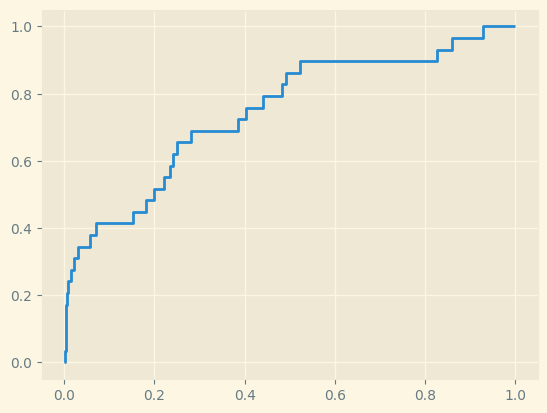

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr,tpr,_ = roc_curve(expected, predicted_prob[:,1])
plt.plot(fpr,tpr)
plt.show()

In [56]:
auc(fpr, tpr)

0.7474052226543567

In [57]:
roc_auc_score(expected, predicted_prob[:,1])

0.7474052226543567

In [58]:
n_estimators = 100
max_samples = 'auto'
contamination = 0.5
# contamination = num_Fraud/(num_Normal+num_Fraud)
seed = 23

from sklearn.ensemble import IsolationForest

IForest = IsolationForest(n_estimators=n_estimators,
                          max_samples=max_samples,
                          contamination=contamination,
                          random_state=seed)

# Drop rows with any missing values
# credit_combined.dropna(inplace=True)

IForest.fit(X_train_scaled)

IsolationForest(contamination=0.5, random_state=23)

In [59]:
y_true = y_train

y_pred = IForest.predict(X_train_scaled)
y_pred = np.where(y_pred == 1, 0, 1)

In [60]:
classificationReport = classification_report(y_true, y_pred, target_names=["non_fraud", "fraud"])
print(classificationReport)

              precision    recall  f1-score   support

   non_fraud       1.00      0.50      0.67     11657
       fraud       0.01      0.96      0.02        48

    accuracy                           0.50     11705
   macro avg       0.50      0.73      0.34     11705
weighted avg       1.00      0.50      0.67     11705



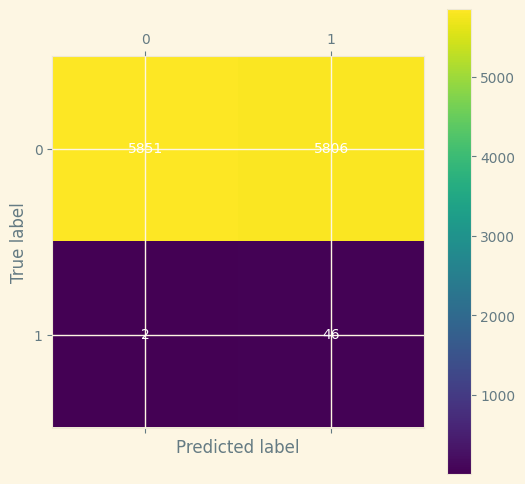

In [61]:
from sklearn.metrics import confusion_matrix

result_cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))

plt.matshow(result_cm, fignum=1)
plt.xticks(range(2), [0, 1])
plt.yticks(range(2), [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()

for (i, j), val in np.ndenumerate(result_cm):
    plt.text(j, i, f'{val}', ha='center', va='center', color='white')

plt.show()

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [63]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=23, n_jobs=-1)

In [64]:
from joblib import Parallel, delayed
from sklearn.model_selection import cross_val_score

score = cross_val_score(rf, X_train_scaled, y_train, cv=kf, scoring='recall')

In [65]:
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.44444444 0.88888889 0.7        0.7        0.8       ]
Average Cross Validation Recall score: 0.7066666666666667


In [66]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 10, 12], 'random_state': [23]}

grid_rf = GridSearchCV(rf,param_grid=params,cv=kf,scoring='recall',n_jobs=-1).fit(X_train_scaled, y_train)

print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 23}
Best score: 0.7066666666666667


In [67]:
y_pred = grid_rf.predict(X_test_scaled)

In [69]:
import numpy as np

mask = ~np.isnan(y_test)  # Create a mask to filter out NaN values
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]

classificationReport = classification_report(y_test_filtered, y_pred_filtered, target_names=["non_fraud", "fraud"])
print(classificationReport)


              precision    recall  f1-score   support

   non_fraud       1.00      1.00      1.00     11667
       fraud       0.00      0.00      0.00        29

    accuracy                           1.00     11696
   macro avg       0.50      0.50      0.50     11696
weighted avg       1.00      1.00      1.00     11696

